In [1]:
import sys
sys.path.append('../scripts/')

import os
import pickle
import numpy as np
import matplotlib.pyplot as plt
import tensorflow as tf
from data_preparation import load_images, save_data, load_data, load_test_data
from model_preparation import get_siamese_model
from model_training import train, make_oneshot_task, test_oneshot_task
from nearest_neighbours import test_nn_accuracy
from plotting_images import plot_oneshot_task

plt.style.use("seaborn")

In [2]:
train_folder = "../data/images_background/"
val_folder = "../data/images_evaluation/"
test_folder = "../data/images_test/"
model_path = "../models/"

# Loading and preparing data. 

We will load train and validation images, put them into vectors and save for future usage.

In [3]:
"""Preparing training data.
x (ndarray): Array of arrays where each array (character) contains
                     vector images (character representation).
languages_characters_indexes (dict<str, list>): Key is language, value is list
                                                of 2 elements: index of 1st character
                                                and index of last.
""" 
x, categories = load_images(train_folder)
save_data("train", x, categories)

Loading alphabet: Grantha
Loading alphabet: Hebrew
Loading alphabet: Anglo-Saxon_Futhorc
Loading alphabet: Korean
Loading alphabet: Braille
Loading alphabet: Sanskrit
Loading alphabet: Gujarati
Loading alphabet: N_Ko
Loading alphabet: Inuktitut_(Canadian_Aboriginal_Syllabics)
Loading alphabet: Balinese
Loading alphabet: Futurama
Loading alphabet: Mkhedruli_(Georgian)
Loading alphabet: Ojibwe_(Canadian_Aboriginal_Syllabics)
Loading alphabet: Greek
Loading alphabet: Syriac_(Estrangelo)
Loading alphabet: Latin
Loading alphabet: Asomtavruli_(Georgian)
Loading alphabet: Alphabet_of_the_Magi
Loading alphabet: Arcadian
Loading alphabet: Japanese_(hiragana)
Loading alphabet: Early_Aramaic
Loading alphabet: Bengali
Loading alphabet: Tifinagh
Loading alphabet: Burmese_(Myanmar)
Loading alphabet: Japanese_(katakana)
Loading alphabet: Armenian
Loading alphabet: Tagalog
Loading alphabet: Blackfoot_(Canadian_Aboriginal_Syllabics)
Loading alphabet: Malay_(Jawi_-_Arabic)
Loading alphabet: Cyrillic


In [4]:
"""Preparing validation data.
"""
x_val, categories_val = load_images(val_folder)
save_data("val", x_val, categories_val)

Loading alphabet: Gurmukhi
Loading alphabet: Keble
Loading alphabet: Atlantean
Loading alphabet: Ge_ez
Loading alphabet: Glagolitic
Loading alphabet: Atemayar_Qelisayer
Loading alphabet: Tengwar
Loading alphabet: Manipuri
Loading alphabet: ULOG
Loading alphabet: Avesta
Loading alphabet: Sylheti
Loading alphabet: Syriac_(Serto)
Loading alphabet: Malayalam
Loading alphabet: Oriya
Loading alphabet: Old_Church_Slavonic_(Cyrillic)
Loading alphabet: Mongolian
Loading alphabet: Aurek-Besh
Loading alphabet: Angelic
Loading alphabet: Kannada
Loading alphabet: Tibetan


In [5]:
"""Preparing test data.
"""
x_test, categories_test = load_images(test_folder)
save_data("test", x_test, categories_test)

Loading alphabet: Russian


# Preparing model 

## Loading model 

In [6]:
model = get_siamese_model((105, 105, 1))

In [7]:
model.summary()

Model: "model"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            [(None, 105, 105, 1) 0                                            
__________________________________________________________________________________________________
input_2 (InputLayer)            [(None, 105, 105, 1) 0                                            
__________________________________________________________________________________________________
sequential (Sequential)         (None, 4096)         38947648    input_1[0][0]                    
                                                                 input_2[0][0]                    
__________________________________________________________________________________________________
lambda (Lambda)                 (None, 4096)         0           sequential[1][0]             

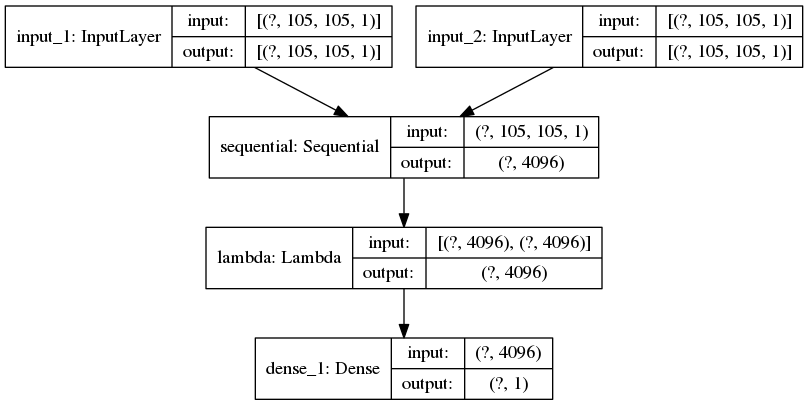

In [8]:
display(tf.keras.utils.plot_model(model, show_shapes=True))

## Training model

# Comparing model

## Loading data 

In [9]:
# Loading model weights.
model.load_weights(os.path.join(model_path, "iteration-19675-val_acc-0.97-loss-0.14.h5"))

In [10]:
# Loading data.
x, categories = load_data("train")
x_val, categories_val = load_data("val")
x_test, categories_test = load_test_data("test")

Loaded train alphabets: 

['Grantha', 'Hebrew', 'Anglo-Saxon_Futhorc', 'Korean', 'Braille', 'Sanskrit', 'Gujarati', 'N_Ko', 'Inuktitut_(Canadian_Aboriginal_Syllabics)', 'Balinese', 'Futurama', 'Mkhedruli_(Georgian)', 'Ojibwe_(Canadian_Aboriginal_Syllabics)', 'Greek', 'Syriac_(Estrangelo)', 'Latin', 'Asomtavruli_(Georgian)', 'Alphabet_of_the_Magi', 'Arcadian', 'Japanese_(hiragana)', 'Early_Aramaic', 'Bengali', 'Tifinagh', 'Burmese_(Myanmar)', 'Japanese_(katakana)', 'Armenian', 'Tagalog', 'Blackfoot_(Canadian_Aboriginal_Syllabics)', 'Malay_(Jawi_-_Arabic)', 'Cyrillic']


Loaded val alphabets: 

['Gurmukhi', 'Keble', 'Atlantean', 'Ge_ez', 'Glagolitic', 'Atemayar_Qelisayer', 'Tengwar', 'Manipuri', 'ULOG', 'Avesta', 'Sylheti', 'Syriac_(Serto)', 'Malayalam', 'Oriya', 'Old_Church_Slavonic_(Cyrillic)', 'Mongolian', 'Aurek-Besh', 'Angelic', 'Kannada', 'Tibetan']


Loaded test alphabets: 

['Russian']




## Predicting values

Let's run nearest neighbours method and our model throw predicting comparison where we comparing with $1, 3, 5,$ etc. photos.

In [11]:
# Amount of photos we comparing to.
ways = np.arange(1, 22, 2)

# Number of trials for each amount.
trials = 50

In [13]:
train_accs, val_accs, nn_accs_val, test_accs, nn_accs_test = [], [], [], [], []

for N in ways:    
    train_accs.append(test_oneshot_task(model, N, trials, x, categories, verbose=True))
   
    val_accs.append(test_oneshot_task(model, N, trials, x_val, categories_val, verbose=True))    
    nn_accs_val.append(test_nn_accuracy(N, trials, x_val, categories_val))
    
    test_accs.append(test_oneshot_task(model, N, trials, x_test, categories_test, verbose=True))    
    nn_accs_test.append(test_nn_accuracy(N, trials, x_test, categories_test))
    
    print ("NN validation accuracy:", nn_accs_val[-1])
    print("-----------------------------------------------------")
    print ("NN test accuracy:", nn_accs_test[-1])
    print("-----------------------------------------------------")    

Evaluating model on 50 random 1 way one-shot learning tasks ... 

Got an average of 1.00 in 1 way one-shot learning accuracy 

Evaluating model on 50 random 1 way one-shot learning tasks ... 

Got an average of 1.00 in 1 way one-shot learning accuracy 

Evaluating nearest neighbour on 50 unique 1-way one-shot learning tasks ...
Evaluating model on 50 random 1 way one-shot learning tasks ... 

Got an average of 1.00 in 1 way one-shot learning accuracy 

Evaluating nearest neighbour on 50 unique 1-way one-shot learning tasks ...
NN validation accuracy: 1.0
-----------------------------------------------------
NN test accuracy: 1.0
-----------------------------------------------------
Evaluating model on 50 random 3 way one-shot learning tasks ... 

Got an average of 1.00 in 3 way one-shot learning accuracy 

Evaluating model on 50 random 3 way one-shot learning tasks ... 

Got an average of 0.94 in 3 way one-shot learning accuracy 

Evaluating nearest neighbour on 50 unique 3-way one-sho

In [14]:
# Saving accuracies.
with open(os.path.join("../data/arrays", "accuracies.pickle"), "wb") as f:
    pickle.dump((train_accs, val_accs, nn_accs_val, test_accs, nn_accs_test), f)

## Exploring outputs 

In [15]:
# Loading accuracies.
with open(os.path.join("../data/arrays", "accuracies.pickle"), "rb") as f:
    (train_accs, val_accs, nn_accs_val, test_accs, nn_accs_test) = pickle.load(f)

Building plots comparing theese runs.

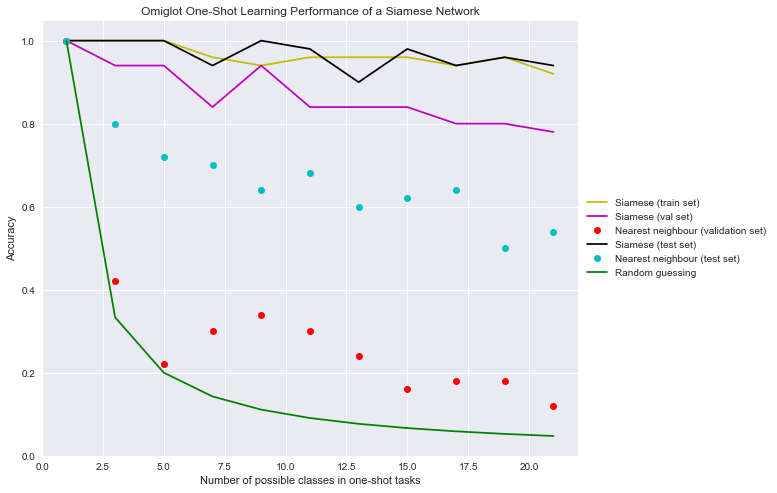

In [16]:
fig, ax = plt.subplots(1)

ax.plot(ways, train_accs, "y", label="Siamese (train set)")

ax.plot(ways, val_accs, "m", label="Siamese (val set)")
ax.plot(ways, nn_accs_val, "ro", label="Nearest neighbour (validation set)")

ax.plot(ways, test_accs, "k", label="Siamese (test set)")
ax.plot(ways, nn_accs_test, "co", label="Nearest neighbour (test set)")

ax.plot(ways, 1./ways, "g", label="Random guessing")

plt.xlabel("Number of possible classes in one-shot tasks")
plt.ylabel("Accuracy")
plt.title("Omiglot One-Shot Learning Performance of a Siamese Network")

box = ax.get_position()
ax.set_position([box.x0, box.y0, box.width * 0.8, box.height])
ax.legend(loc='center left', bbox_to_anchor=(1, 0.5))

fig.set_size_inches(12, 8, forward=True)

plt.show()

# Using model 

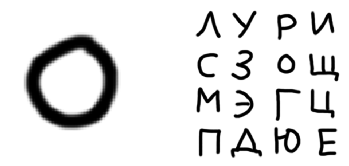

In [17]:
pairs, targets = make_oneshot_task(16, x_test, categories_test, "Russian")
plot_oneshot_task(pairs)

In [18]:
np.argmax(model.predict_on_batch(pairs))

6